<a href="https://colab.research.google.com/github/gustavonaumann/Data_Science/blob/main/Projeto_Panorama_do_COVID_19_em_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados deste projeto foram coletados do [Our World in Data](https://ourworldindata.org/coronavirus), em que foram atualizados diariamente até 19/08/24, e disponibilizados [neste link](https://github.com/owid/covid-19-data/tree/master/public/data). A partir dessa extensa base de dados, é esperado que seja possível fazer diversos tipos de análises, relacionando os dados relevantes entre si, para ajudar na melhor compreensão da COVID-19.

Para analisar a COVID-19, sendo essa uma potente doença nova no mundo atual, é enfrentado uma série de dificuldades complexas, que atrapalham e podem comprometer os dados sobre a doença, como a falta de conhecimento inicial sobre o coronavírus para poder coletar os dados, diferenças entre a coleta e divulgação de dados de governos federais, estaduais e os não-oficiais, que levam a dados conflitantes e incompletos, que dificultam consideravelmente a interpretação.

### Importando os dados do COVID-19

A partir da base de dados disponibilizada no GitHub, iremos importar o dataset completo em formato .csv, disponível [aqui](https://covid.ourworldindata.org/data/owid-covid-data.csv).

In [106]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
import datetime

sns.set_style()
%matplotlib inline

In [107]:
# importar o dataset COVID-19 para um DataFrame

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

### Dicionário de Variáveis

A seguir, teremos um dicionário para indicar o que cada coluna no dataset representa:

* `iso_code` - Código de 3 letras para países
* `continent` - Continente da localização
* `location` - Localização geográfica
* `date` - Data
* `total_cases` - Casos totais
* `new_cases` - Casos novos
* `new_cases_smoothed` - Casos novos (suavizado por 7 dias)
* `total_deaths` - Mortes totais
* `new_deaths` - Novas mortes
* `new_deaths_smoothed` - Novas mortes (suavizado por 7 dias)
* `total_cases_per_million` - Casos totais a milhão de pessoas
* `new_cases_per_million` - Novos casos a cada milhão de pessoas
* `new_cases_smoothed_per_million` - Novos casos a cada um milhão de pessoas (suavizado por 7 dias)
* `total_deaths_per_million` - Mortes totais a cada milhão de pessoas
* `new_deaths_per_million` - Novas mortes a cada milhão de pessoas
* `new_deaths_smoothed_per_million` - Novas mortes a cada milhão (suavizado por 7 dias)
* `reproduction_rate` - Taxa de reprodução em tempo real da COVID-19
* `icu_patients` - Pacientes em UTI
* `icu_patients_per_million` - Pacientes em UTI a cada milhão de pessoas
* `hosp_patients` - Pacientes hospitalizados
* `hosp_patients_per_million` - Pacientes hospitalizados a cada milhão de pessoas
* `weekly_icu_admissions` - Novas admissões à UTI por semana
* `weekly_icu_admissions_per_million` - Novas admissões à UTI por semana a cada milhão de pessoas
* `weekly_hosp_admissions` - Novas pessoas hospitalizadas por semana
* `weekly_hosp_admissions_per_million` - Novas pessoas hospitalizadas por semana a cada milhão de pessoas
* `total_tests` - Total de testes de COVID-19
* `new_tests` - Novos testes de COVID-19
* `total_tests_per_thousand` - Total de testes a cada mil pessoas
* `new_tests_per_thousand` - Novos testes a cada mil pessoas
* `new_tests_smoothed` - Novos testes (suavizado por 7 dias)
* `new_tests_smoothed_per_thousand` - Novos testes a cada mil pessoas (suavizado por 7 dias)
* `positive_rate` - Porcentagem de testes positivos ao longo de uma semana
* `tests_per_case` - Testes feitos a cada novo caso confirmado
* `tests_units` - Unidade de cada localização para informr os seus dados de teste
* `total_vaccinations` - Total de vacinas aplicadas
* `people_vaccinated` - Total de pessoas que receberam ao menos uma dose da vacina
* `people_fully_vaccinated` - Pessoas que receberam o número de doses prescritas
* `total_boosters` - Vacinas de reforço aplicadas
* `new_vaccinations` - Novas vacinas aplicadas
* `new_vaccinations_smoothed` - Novas vacinas aplicadas (suavizado por 7 dias)
* `total_vaccinations_per_hundred` - Total de vacinas a cada cem pessoas
* `people_vaccinated_per_hundred` - Pessoas vacinadas a cada cem pessoas
* `people_fully_vaccinated_per_hundred` - Pessoas que receberam o número de doses precritas a cada cem pessoas
* `total_boosters_per_hundred` - Vacinas de reforço aplicadas a cada 100 pessoas
* `new_vaccinations_smoothed_per_million` - Novas vacinas aplicadas a cada milhão de pessoas (suavizado por 7 dias)
* `new_people_vaccinated_smoothed` - Novas pessoas vacinadas por dia
* `new_people_vaccinated_smoothed_per_hundred` - Novas pessoas vacinadas por dia a cada cem pessoas (suavizado por 7 dias)
* `stringency_index` - Índice de Rigor da Resposta do Governo
* `population_density` - Pessoas por quilomêtro quadrado da localização
* `median_age` - Idade mediana da população
* `aged_65_older` - Porcentagem da população que possui mais de 65 anos
* `aged_70_older` - Porcentagem da população que possui mais de 70 anos
* `gdp_per_capita` - PIB em paridade de poder de compra da localização em dólar
* `extreme_poverty` - Porcentagem da população em extrema pobreza
* `cardiovasc_death_rate` - Taxa de morte por doença cardiovascular em 2017 (número anual de mortes a cada cem mil pessoas)
* `diabetes_prevalence` - Porcentagem da população entre 20 a 79 anos com prevalência de diabetes em 2017
* `female_smokers` - Porcentagem das mulheres que fumam
* `male_smokers` - Porcentagem dos homens que fumam
* `handwashing_facilities` - Porcentagem da população com acesso à saneamento básico
* `hospital_beds_per_thousand` - Camas de hospitais a cada mil pessoas
* `life_expectancy` - Expectativa de vida em 2019
* `human_development_index` - Índice de desenvolvimento humano
* `population` - População da localização
* `excess_mortality_cumulative_absolute` - Diferença cumulativa entre as mortes desde 1/1/2020 e o número projetado de mortes
* `excess_mortality_cumulative` - Diferença percentual entre as mortes cumulativas desde 1/1/2020 e o número projetado de mortes
* `excess_mortality` - Diferença percentual entre as mortes semanais ou mensais em 2021 e o número projetado de mortes
* `excess_mortality_cumulative_per_million` - Diferença cumulativa entre as mortes desde 1/1/2020 e o número projetado de mortes a cada milhão de pessoas

## Análise Exploratória dos Dados

Nesta seção, iremos primeiro entender a base de dados que estamos lidando e então comparar dados de diferentes países, para algumas variáveis importantes para entendermos o comportamento da COVID-19.

### Análise Exploratória Inicial


Inicialmente, iremos ver as dimensões do dataset, suas primeiras entradas, e o tipo de cada variável.

In [108]:
# dimensões do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# visualizar as 5 primeiras entradas do dataset
df.head()

Dimensões do Dataset 
Variáveis:  67 
Entradas:  429435


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [109]:
# tipos das variáveis

df.dtypes

,0
iso_code,object
continent,object
location,object
date,object
total_cases,float64
...,...
population,int64
excess_mortality_cumulative_absolute,float64
excess_mortality_cumulative,float64
excess_mortality,float64


Percebemos que a variável `date` não está em formato `datetime`, então para podermos explorar essa variável ao máximo, convertemos:

In [110]:
# converter a variável date para datetime

df.date = pd.to_datetime(df.date)

Outro detalhe inicial importantíssimo é verificar a presença de valores ausentes:

In [111]:
# checar a presença e frequência de valores ausentes nas variáveis, ordenando por ordem decrescente

round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False), 2)

,0
weekly_icu_admissions_per_million,0.97
weekly_icu_admissions,0.97
excess_mortality_cumulative_per_million,0.97
excess_mortality,0.97
excess_mortality_cumulative,0.97
...,...
total_deaths,0.04
population,0.00
date,0.00
location,0.00


Como percebemos acima, algumas variáveis possuem alta porcentagem de valores ausentes. No entanto, também verificamos que algumas possuem baixa taxa, então, é possível remover esses dados em que possuem valor nulo, para não atrapalharem na análise:

In [112]:
# criar um novo dataframe, removendo os valores nulos

df_clean = df.dropna(subset=['total_cases'], axis=0)

Após essa análise inicial, iremos verificar a data mais recente presente no dataset, e visualizar os países mais número de casos:

In [113]:
# checar qual data é a mais recente

date_max = df_clean.date.max()
print(date_max)

2024-08-04 00:00:00


In [114]:
#total de casos para a data mais recente

df_clean.loc[df_clean.date == date_max].sort_values(by='total_cases', ascending=False)[0:10]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
424402,OWID_WRL,NaN,World,2024-08-04,775866783.0,47169.0,6738.429,7057132.0,815.0,116.429,...,34.635,60.13,2.705,72.58,0.737,7975105024,NaN,NaN,NaN,NaN
166872,OWID_HIC,NaN,High-income countries,2024-08-04,429044049.0,32293.0,4613.286,2997359.0,786.0,112.286,...,NaN,NaN,NaN,NaN,NaN,1250514600,NaN,NaN,NaN,NaN
21765,OWID_ASI,NaN,Asia,2024-08-04,301499099.0,4515.0,645.000,1637249.0,17.0,2.429,...,NaN,NaN,NaN,NaN,NaN,4721383370,NaN,NaN,NaN,NaN
120242,OWID_EUR,NaN,Europe,2024-08-04,252916868.0,39047.0,5578.143,2102483.0,162.0,23.143,...,NaN,NaN,NaN,NaN,NaN,744807803,NaN,NaN,NaN,NaN
409811,OWID_UMC,NaN,Upper-middle-income countries,2024-08-04,251753518.0,14277.0,2039.571,2824452.0,29.0,4.143,...,NaN,NaN,NaN,NaN,NaN,2525921300,NaN,NaN,NaN,NaN
123276,OWID_EUN,NaN,European Union (27),2024-08-04,185822587.0,25642.0,3663.143,1262988.0,150.0,21.429,...,NaN,NaN,NaN,NaN,NaN,450146793,NaN,NaN,NaN,NaN
278858,OWID_NAM,NaN,North America,2024-08-04,124492666.0,454.0,64.857,1671178.0,619.0,88.429,...,NaN,NaN,NaN,NaN,NaN,600323657,NaN,NaN,NaN,NaN
405124,USA,North America,United States,2024-08-04,103436829.0,NaN,NaN,1193165.0,619.0,88.429,...,24.600,NaN,2.770,78.86,0.926,338289856,NaN,NaN,NaN,NaN
75343,CHN,Asia,China,2024-08-04,99373219.0,2087.0,298.143,122304.0,15.0,2.143,...,48.400,NaN,4.340,76.91,0.761,1425887360,NaN,NaN,NaN,NaN
222800,OWID_LMC,NaN,Lower-middle-income countries,2024-08-04,91954400.0,598.0,85.429,1188026.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,3432097300,NaN,NaN,NaN,NaN


A partir da tabela acima, conseguimos identificar que ao todo, houveram cerca de 776 milhões casos totais no mundo desde o início da pandemia, e cerca de 7 milhões de mortes totais. No entanto, não conseguimos visualizar os dados para apenas os países mais afetados, e para isso, devemos realizar:

In [115]:
# visualizar dados de países como localização

df_countries = df_clean.dropna(subset='continent', axis=0)

In [116]:
# países com maior número de casos totais

df_countries.loc[df_countries.date == date_max].sort_values(by='total_cases', ascending=False)[0:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
405124,USA,North America,United States,2024-08-04,103436829.0,NaN,NaN,1193165.0,619.0,88.429,...,24.6,NaN,2.77,78.86,0.926,338289856,NaN,NaN,NaN,NaN
75343,CHN,Asia,China,2024-08-04,99373219.0,2087.0,298.143,122304.0,15.0,2.143,...,48.4,NaN,4.34,76.91,0.761,1425887360,NaN,NaN,NaN,NaN
175222,IND,Asia,India,2024-08-04,45041748.0,313.0,44.714,533623.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
132040,FRA,Europe,France,2024-08-04,38997490.0,NaN,NaN,168091.0,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
142084,DEU,Europe,Germany,2024-08-04,38437756.0,NaN,NaN,174979.0,NaN,NaN,...,33.1,NaN,8.00,81.33,0.947,83369840,NaN,NaN,NaN,NaN


Assim, vemos que os países com mais casos totais são:
* Estados Unidos - 103.436.829 de casos
* China - 99.373.219 de casos
* Índia - 45.041.748 de casos

Em seguida, veremos os países com maior número de mortes:

In [117]:
# países com maior número de mortes totais

df_countries.loc[df_countries.date == date_max].sort_values(by='total_deaths', ascending=False)[0:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
405124,USA,North America,United States,2024-08-04,103436829.0,NaN,NaN,1193165.0,619.0,88.429,...,24.6,NaN,2.77,78.86,0.926,338289856,NaN,NaN,NaN,NaN
51907,BRA,South America,Brazil,2024-08-04,37511921.0,0.0,0.000,702116.0,0.0,0.000,...,17.9,NaN,2.20,75.88,0.765,215313504,NaN,NaN,NaN,NaN
175222,IND,Asia,India,2024-08-04,45041748.0,313.0,44.714,533623.0,0.0,0.000,...,20.6,59.550,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
317756,RUS,Europe,Russia,2024-08-04,24268728.0,7777.0,1111.000,403188.0,10.0,1.429,...,58.3,NaN,8.05,72.58,0.824,144713312,NaN,NaN,NaN,NaN
245371,MEX,North America,Mexico,2024-08-04,7619458.0,340.0,48.571,334551.0,0.0,0.000,...,21.4,87.847,1.38,75.05,0.779,127504120,NaN,NaN,NaN,NaN


Como vemos acima, os países com maior número de mortes totais são
* Estados Unidos - 1.193.165 de mortes
* Brasil - 702.116 de mortes
* Índia - 533.623 de mortes

### Gráficos

Nesta subseção, iremos plotar gráficos para melhor visualização dos dados do dataset.

Primeiramente, iremos visualizar o número de casos comparado com o número de mortes:

In [129]:
def mill(x, pos):
    """Função para plotar gráficos em milhões"""
    return '{:1.1f}M'.format(x*1e-6)

def mil(x, pos):
    """Função para plotar gráficos em milhares"""
    return '{:1.1f}k'.format(x*1e-3)

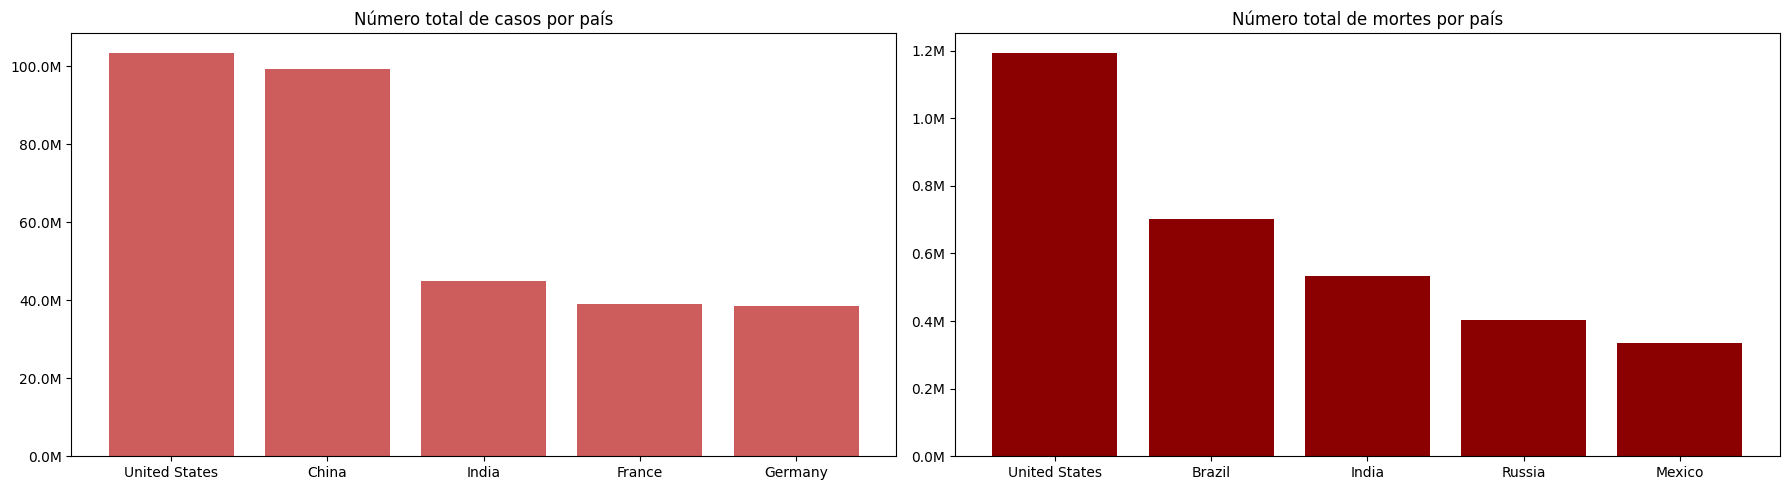

In [127]:
# acessar a relação entre mortes e casos com os 5 países mais afetados

top5_deaths = df_countries.loc[df_countries.date == date_max, ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:5]
top5_cases = df_countries.loc[df_countries.date == date_max, ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:5]

fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)


ax1.bar('location', 'total_cases', data=top5_cases, color='indianred')
ax1.set_title('Número total de casos por país')



ax2.bar('location', 'total_deaths', data=top5_deaths, color='darkred')
ax2.set_title('Número total de mortes por país')

ax1.yaxis.set_major_formatter(mill)
ax2.yaxis.set_major_formatter(mill)

plt.tight_layout()


Em seguida, iremos plotar um gráfico para observar a progressão do número de casos ao longo dos anos:

<ipython-input-151-05e128339a64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_new_cases.drop(no_new_cases[no_new_cases.new_cases == 0].index, axis=0, inplace=True)
<ipython-input-151-05e128339a64>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_new_deaths.drop(no_new_deaths[no_new_deaths.new_deaths == 0].index, axis=0, inplace=True)


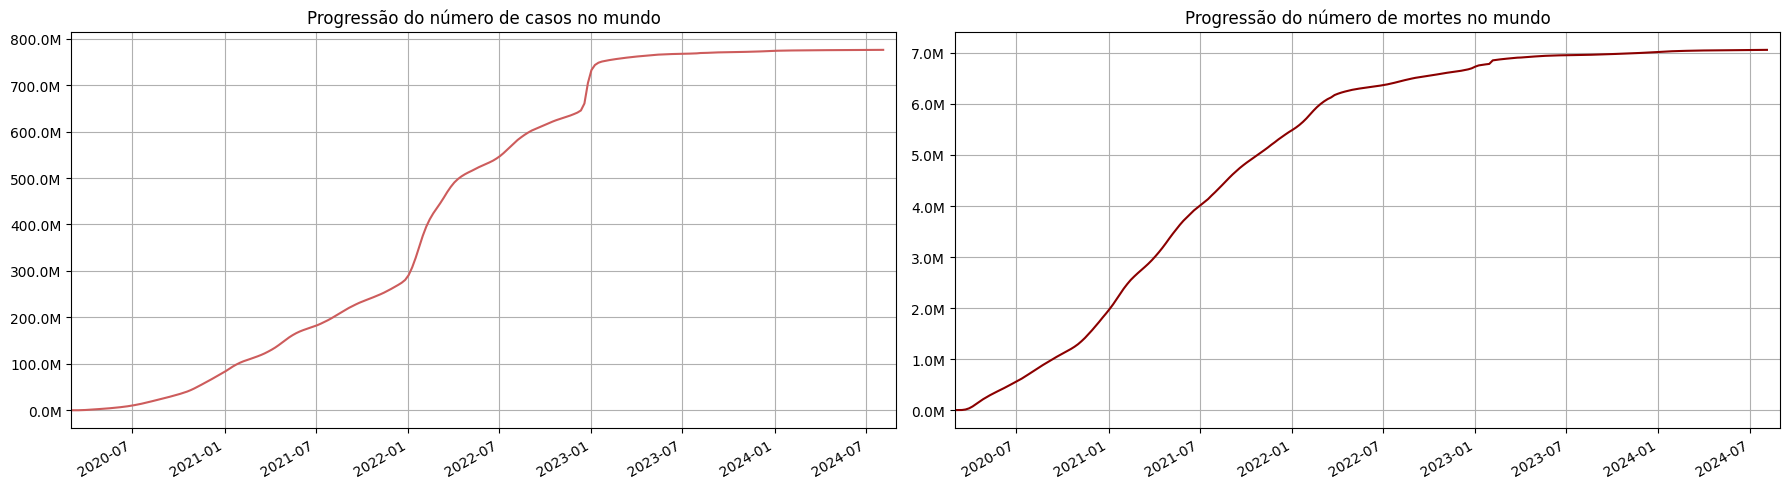

In [151]:
# plotar gráfico de linha para mostrar a progressão da doença

fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)

# duplicar o dataframe para tirar dados que atrapalhem na suavização do gráfico, sem comprometer o dataframe original

no_new_cases = df_clean
no_new_deaths = df_clean

no_new_cases.drop(no_new_cases[no_new_cases.new_cases == 0].index, axis=0, inplace=True)
no_new_deaths.drop(no_new_deaths[no_new_deaths.new_deaths == 0].index, axis=0, inplace=True)

# criar variáveis para ser os eixos x e y dos gráficos

tot_case = no_new_cases.loc[no_new_cases.location == "World", "total_cases"].reset_index(drop=True)
tot_death = no_new_deaths.loc[no_new_deaths.location == "World", "total_deaths"].reset_index(drop=True)

date_case = no_new_cases.loc[no_new_cases.location == "World", "date"].reset_index(drop=True)
date_death = no_new_deaths.loc[no_new_deaths.location == "World", "date"].reset_index(drop=True)

# plotar e personalizar os gráficos

ax1.plot(date_case, tot_case, c='indianred')
ax1.set_title('Progressão do número de casos no mundo')
ax1.set_xlim([datetime.date(2020, 3, 1), datetime.date(2024, 8, 30)])
ax1.grid()

ax2.plot(date_death, tot_death, c='darkred')
ax2.set_title('Progressão do número de mortes no mundo')
ax2.set_xlim([datetime.date(2020, 3, 1), datetime.date(2024, 8, 30)])
ax2.grid()



ax1.yaxis.set_major_formatter(mill)
ax2.yaxis.set_major_formatter(mill)

plt.gcf().autofmt_xdate()


plt.tight_layout()

Ao longo de ambos os gráficos, que estão ambamente relacionados, percebemos que existem picos em diferentes épocas, mas no final dos dados (a partir de 2023) há uma certa estabilidade, indicando o fim da pandemia.

Ainda, podemos plotar um gráfico de dispersão `gdp_per_capita` pelo número de mortos total, para analisarmos como o PIB de um país se relaciona com o número total de mortos.

<ipython-input-150-891f5be58051>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries.drop(df_countries[df_countries.total_deaths < 100].index, axis=0, inplace=True)
<ipython-input-150-891f5be58051>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries.drop(df_countries[df_countries.gdp_per_capita < 100].index, axis=0, inplace=True)


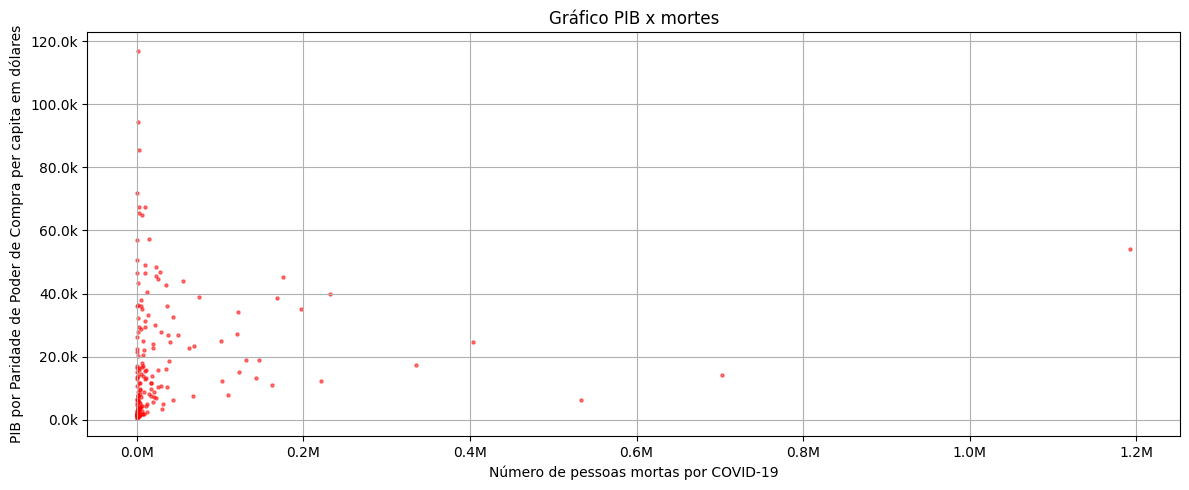

In [150]:
# plotar o gráfico de PIB por número de mortos

fig, ax = plt.subplots(figsize=(12,5));

# retirar do dataframe dados que atrapalham na visualização do gráfico e obter as variáveis para o plot

df_countries.drop(df_countries[df_countries.total_deaths < 100].index, axis=0, inplace=True)
df_countries.drop(df_countries[df_countries.gdp_per_capita < 100].index, axis=0, inplace=True)

death_countries = df_countries.loc[df_countries.date == date_max].total_deaths
gdp_countries = df_countries.loc[df_countries.date == date_max].gdp_per_capita

# plotar e personalizar os gráficos

ax.scatter(death_countries, gdp_countries, s=5, c='red', alpha=0.5)
ax.set_title('Gráfico PIB x mortes')
ax.set_xlabel('Número de pessoas mortas por COVID-19')
ax.set_ylabel('PIB por Paridade de Poder de Compra per capita em dólares')


plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)


ax.yaxis.set_major_formatter(mil)
ax.xaxis.set_major_formatter(mill)


plt.grid()

plt.tight_layout()

### Análise Exploratória para o Brasil

In [133]:
# criar um dataframe apenas com Brasil

df_brazil = df.loc[df.location == "Brazil"].copy()

df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN


Com esse dataframe, iremos identificar e analisar alguns dados sobre o COVID-19 no Brasil:

#### Primeira Morte no Brasil

In [134]:
# identificar qual o índice do primeiro dia em que houve morte no Brasil

df_brazil.loc[df_brazil.new_deaths != 0.0].head(1).index

Index([50311], dtype='int64')

In [135]:
print('A primeira morte foi registrada em {}'.format(df_brazil.date.loc[50311]))

A primeira morte foi registrada em 2020-03-22 00:00:00


#### Tempo que demorou para registrarmos a primeira morte após o primeiro caso

In [136]:
# identificar o índice do dia do primeiro caso no Brasil

df_brazil.loc[df_brazil.new_cases != 0.0].head(1).index

Index([50290], dtype='int64')

In [137]:
print('O primeiro caso foi registrado em {}'.format(df_brazil.date.loc[50290]))

O primeiro caso foi registrado em 2020-03-01 00:00:00


#### Diferença de dias entre o primeiro caso e a primeira morte

In [138]:
# importar pacote necessário para calcular essa diferença

from datetime import date

In [139]:
# calcular a diferença de dias

delta = df_brazil.date.loc[50311] - df_brazil.date.loc[50290]
dif_dias = delta.days

print(f'Se passaram {dif_dias} dias entre o primero caso e a primeira morte no Brasil')

Se passaram 21 dias entre o primero caso e a primeira morte no Brasil


#### Gráficos dos dados do Brasil

In [140]:
df_brazil.total_cases.head()

,total_cases
50234,0.0
50235,0.0
50236,0.0
50237,0.0
50238,0.0


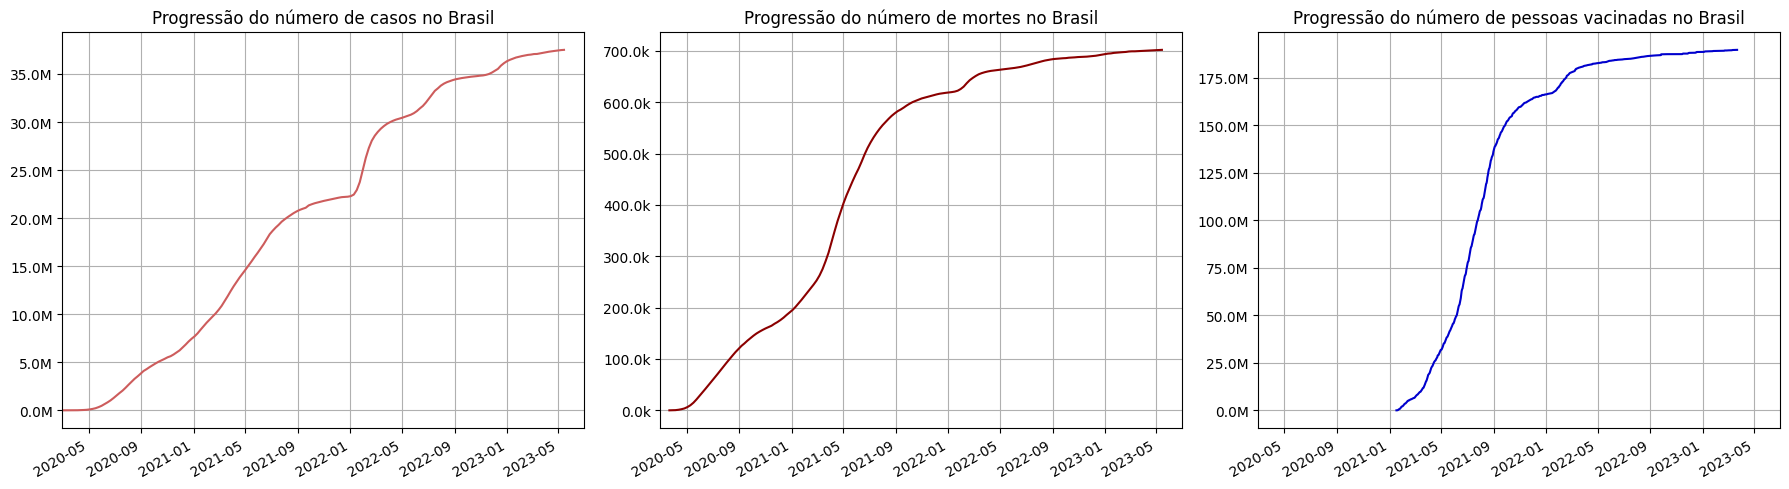

In [143]:
# plotar gráfico de linha

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18,5), ncols=3)

# duplicar o dataframe para tirar dados que atrapalhem na suavização do gráfico, sem comprometer o dataframe original

no_new_cases_bra = df_brazil.copy()
no_new_deaths_bra = df_brazil.copy()
no_new_vacc_bra = df_brazil.copy()


no_new_cases_bra.drop(no_new_cases_bra[no_new_cases_bra.new_cases == 0].index, axis=0, inplace=True)
no_new_deaths_bra.drop(no_new_deaths_bra[no_new_deaths_bra.new_deaths == 0].index, axis=0, inplace=True)
no_new_vacc_bra.dropna(subset=['people_vaccinated'], axis=0, inplace=True)

# criar variáveis para ser os eixos x e y dos gráficos

tot_case_bra = no_new_cases_bra.total_cases.reset_index(drop=True)
tot_death_bra = no_new_deaths_bra.total_deaths.reset_index(drop=True)
tot_vacc_bra = no_new_vacc_bra.people_vaccinated.reset_index(drop=True)

date_case_bra = no_new_cases_bra.date.reset_index(drop=True)
date_death_bra = no_new_deaths_bra.date.reset_index(drop=True)
date_vacc_bra = no_new_vacc_bra.date.reset_index(drop=True)

# plotar e personalizar os gráficos

ax1.plot(date_case_bra, tot_case_bra, c='indianred')
ax1.set_title('Progressão do número de casos no Brasil')
ax1.set_xlim([datetime.date(2020, 3, 1), datetime.date(2023, 6, 30)])
ax1.grid()

ax2.plot(date_death_bra, tot_death_bra, c='darkred')
ax2.set_title('Progressão do número de mortes no Brasil')
ax2.set_xlim([datetime.date(2020, 3, 1), datetime.date(2023, 6, 30)])
ax2.grid()

ax3.plot(date_vacc_bra, tot_vacc_bra, c='mediumblue')
ax3.set_title('Progressão do número de pessoas vacinadas no Brasil')
ax3.set_xlim([datetime.date(2020, 3, 1), datetime.date(2023, 6, 30)])
ax3.grid()

ax1.yaxis.set_major_formatter(mill)
ax2.yaxis.set_major_formatter(mil)
ax3.yaxis.set_major_formatter(mill)


plt.gcf().autofmt_xdate()


plt.tight_layout()

No gráfico acima, percebemos a relação clara entre os 3 gráficos, já que quanto mais há pessoas vacinadas, mais o número de mortes e casos para de crescer. Podemos ver isso ainda mais claramente no próximo gráfico:

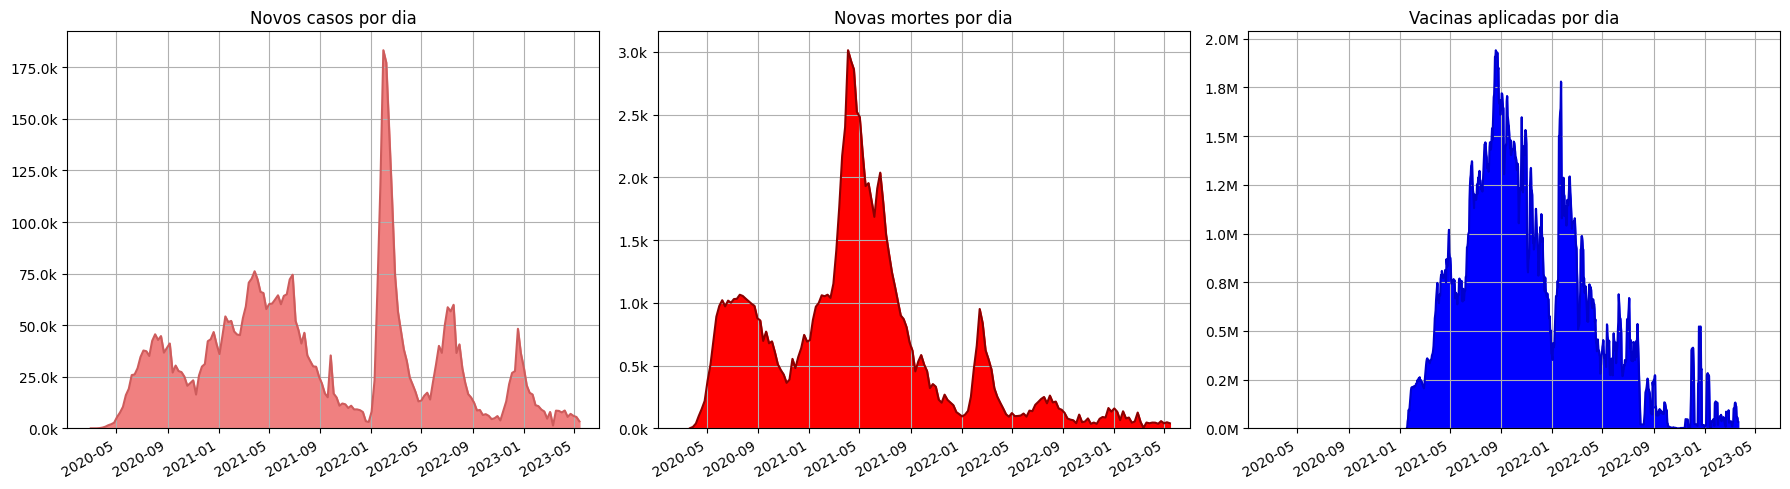

In [147]:
# plotar gráfico de linha

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18,5), ncols=3)

# duplicar o dataframe para tirar dados que atrapalhem na suavização do gráfico, sem comprometer o dataframe original

no_new_cases_bra = df_brazil.copy()
no_new_deaths_bra = df_brazil.copy()


no_new_cases_bra.drop(no_new_cases_bra[no_new_cases_bra.new_cases == 0].index, axis=0, inplace=True)
no_new_deaths_bra.drop(no_new_deaths_bra[no_new_deaths_bra.new_deaths == 0].index, axis=0, inplace=True)

# criar variáveis para ser os eixos x e y dos gráficos

new_case_bra = no_new_cases_bra.new_cases_smoothed.reset_index(drop=True)
new_death_bra = no_new_deaths_bra.new_deaths_smoothed.reset_index(drop=True)
new_vacc_bra = df_brazil.new_vaccinations_smoothed.reset_index(drop=True)

date_case_bra = no_new_cases_bra.date.reset_index(drop=True)
date_death_bra = no_new_deaths_bra.date.reset_index(drop=True)
date_vacc_bra = df_brazil.date.reset_index(drop=True)

# plotar e personalizar os gráficos

ax1.plot(date_case_bra, new_case_bra, c='indianred')
ax1.set_title('Novos casos por dia')
ax1.set_xlim([date_vacc_bra.min(), datetime.date(2023, 6, 30)])
ax1.set_ylim(0)
ax1.grid()
ax1.fill_between(date_case_bra, new_case_bra, color='lightcoral')

ax2.plot(date_death_bra, new_death_bra, c='darkred')
ax2.set_title('Novas mortes por dia')
ax2.set_xlim([date_vacc_bra.min(), datetime.date(2023, 6, 30)])
ax2.set_ylim(0)
ax2.grid()
ax2.fill_between(date_death_bra, new_death_bra, color='red')

ax3.plot(date_vacc_bra, new_vacc_bra, c='mediumblue')
ax3.set_title('Vacinas aplicadas por dia')
ax3.set_xlim([date_vacc_bra.min(), datetime.date(2023, 6, 30)])
ax3.set_ylim(0)
ax3.grid()
ax3.fill_between(date_vacc_bra, new_vacc_bra, color='blue')


ax1.yaxis.set_major_formatter(mil)
ax2.yaxis.set_major_formatter(mil)
ax3.yaxis.set_major_formatter(mill)


plt.gcf().autofmt_xdate()


plt.tight_layout()

Analisando os gráficos do Brasil, percebemos que a base de dados deixa de ser atualizada em meados de maio de 2023.

In [148]:
# importar pacote necessário para plotar o gráfico da mortalidade em porcentagem

import matplotlib.ticker as mtick

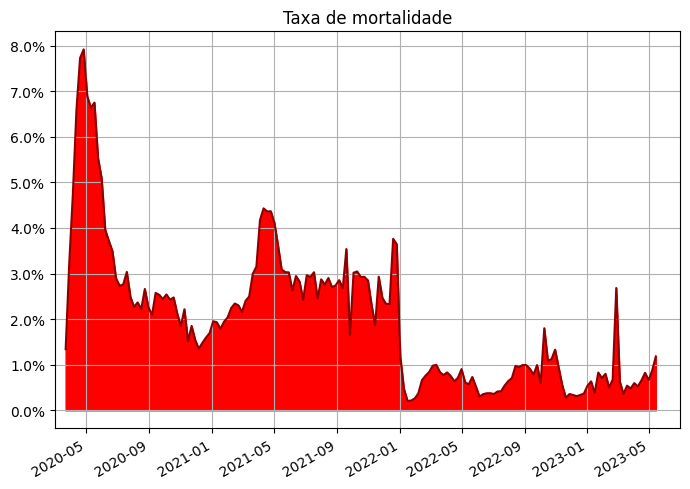

In [149]:
# plotar gráfico de linha

fig, ax = plt.subplots(figsize=(7,5))

# duplicar o dataframe para tirar dados que atrapalhem na suavização do gráfico, sem comprometer o dataframe original

df_bcopy = df_brazil.copy()


df_bcopy.drop(df_bcopy[df_bcopy.new_cases == 0].index, axis=0, inplace=True)
df_bcopy.drop(df_bcopy[df_bcopy.new_deaths == 0].index, axis=0, inplace=True)

# criar variáveis para ser os eixos x e y dos gráficos

mortality = (df_bcopy.new_deaths_smoothed / df_bcopy.new_cases_smoothed)*100
mort_dates = df_bcopy.date

# plotar e personalizar os gráficos

ax.plot(mort_dates, mortality, c='darkred')
ax.set_title('Taxa de mortalidade')
ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2023, 6, 30)])
ax.fill_between(mort_dates, mortality, color='red')
ax.grid()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.gcf().autofmt_xdate()


plt.tight_layout()

## Conclusão
Após a análise, podemos tirar as seguintes conclusões:
* Os Estados Unidos possui o maior número de casos, quase igual com o segundo colocado, China. Porém, possui muito mais mortes que qualquer outro país, indicando o pobre sistema de saúde americano, juntamente com a falta de cuidado com a COVID-19 de diversos cidadãos.
* Podemos estabelecer uma relação entre o PIB de PPC e o número de mortes, que seria quanto menor o PIB, menor a quantidade de mortes, justamente por países que não possuem PIB de PPC geralmente serem menores, e por consequência também não possuirem muita população.
* A análise feita pro Brasil indica que a aplicação da vacina está diretamente relacionada com o número de mortes, já que a taxa de mortalidade decai com o aumento da taxa de vacinas, indicando a eficácia da vacina, como esperado.
* Pelos gráficos do Brasil, podemos perceber também que no início de cada ano, geralmente aumenta a taxa de contaminação e mortes, e de vacina diminui, por se tratar de uma época de férias no Brasil.

